<a href="https://colab.research.google.com/github/CarysDT/Colab-Notebook/blob/main/Unit3proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "preliz[full,notebook]"
import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 943.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1

**Average amount of plays it takes the 49ers to score a touchdown**

I will be analyzing how many plays on average it takes the 49ers to score a touchdown, or Plays/TD. I first am going to predict a prior based on the average Play/TD of the NFL in 2023, then see how the 49ers compare to predict how they will do in the 2024 season.

27.76 Plays/TD is the average for the NFL in 2023

In the NFL the average success rate of a touchdown is 57.3%, so I will use this as the binomial factor of probability of success.

In [2]:
#load in data
#load the data from my github page
url_Plays_Td = 'https://raw.githubusercontent.com/CarysDT/Colab-Notebook/refs/heads/main/Plays_TD%20-%20Sheet1%20(4).csv'
data_Plays_Td = pd.read_csv(url_Plays_Td)
data_Plays_Td

,Game,Plays,TD,Plays/TD,Win-Loss
0,Steelers,66,3,22.000000,W
1,Rams,54,3,18.000000,W
2,Giants,78,3,26.000000,W
3,Cardinals,53,5,10.600000,W
4,Cowboys,67,6,11.166667,W
5,Browns,55,2,27.500000,L
6,Vikings,53,2,26.500000,L
7,Bengals,56,2,28.000000,L
8,Jaguars,60,4,15.000000,W
9,Buccaneers,59,3,19.666667,W


(array([10.,  8.,  4.,  5.,  3.,  0.,  0.,  1.,  0.,  2.]),
 array([ 9. , 14.8, 20.6, 26.4, 32.2, 38. , 43.8, 49.6, 55.4, 61.2, 67. ]),
 <BarContainer object of 10 artists>)

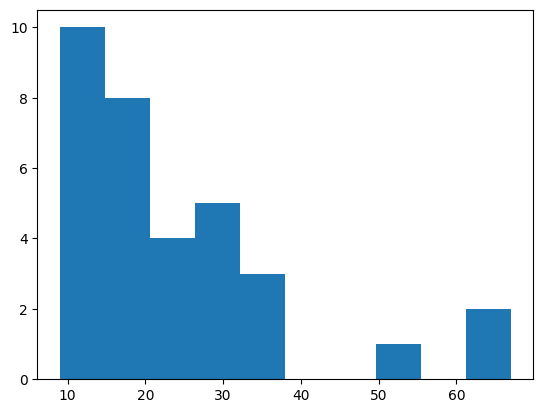

In [3]:
plt.hist(data_Plays_Td['Plays/TD'])

Most of the data is centered around 15, which means it is highly skewed right and esentially gradually decreases as the x axes increases.
This best fits a Geometric distribution, so I will use the formulas for that to calculate the data points, first finding Beta for P, the probability of success of an individual trial.

<Axes: >

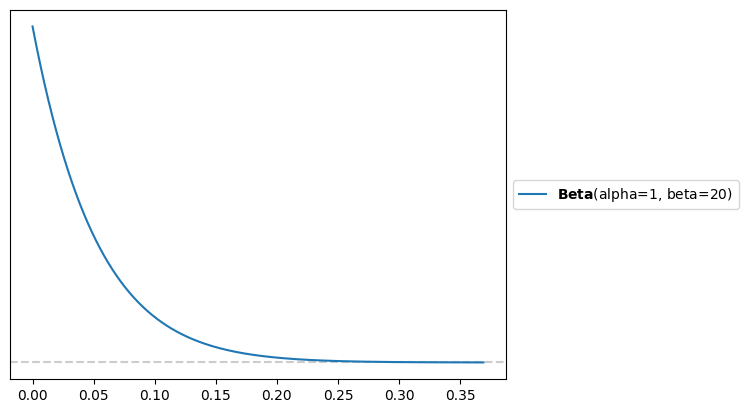

In [4]:
pz.Beta(alpha=1, beta=20).plot_pdf()

In [5]:
with pm.Model() as model_Plays_TD:
    # I have no idea where the mean should be, but its reasonalbe to assume
    # its between our lowest and highest values recorded
    P =pm.Beta('P', alpha=1, beta=20)
    #our fancy new likelihood, with one prior
    Y = pm.Geometric('Y', p = P, observed=data_Plays_Td['Plays/TD'])
    idata_Plays_TD = pm.sample()

Output()

Output()

In [6]:
pm.sample_posterior_predictive(idata_Plays_TD, model=model_Plays_TD, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

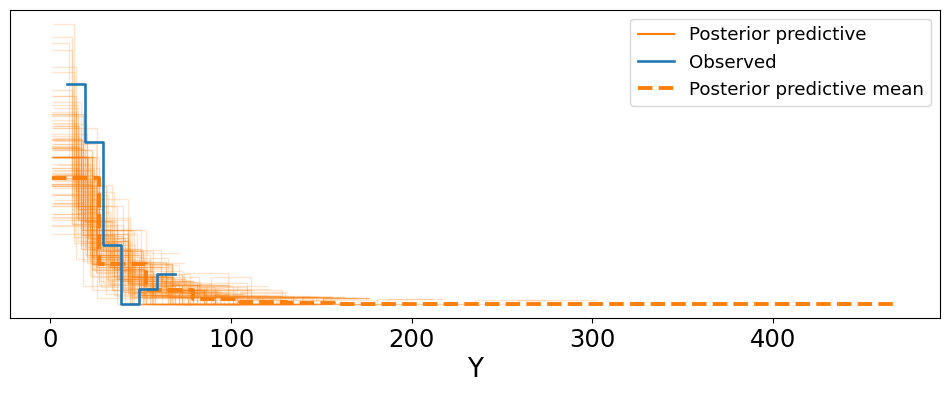

In [7]:
az.plot_ppc(idata_Plays_TD, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Although by definition Plays/TD should match the geometric distribution, given that the definition of geometric distribution is defined as number of tries before a success. In this case it would be number of plays until a successful Touchdown. However the data does not well match the posterier predictive, so we'll have to find another distribution.

Another possible distribution could be Gamma, so I'll set that up and see how accurate it turns out.

<Axes: >

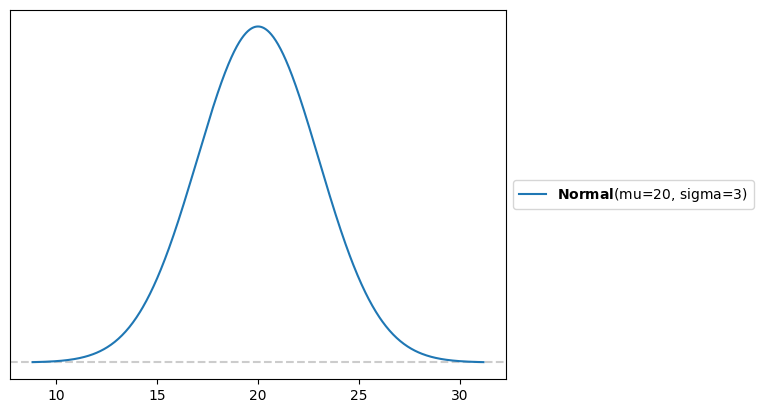

In [10]:
pz.Normal(mu=20, sigma=3).plot_pdf()

Output()

Output()

Output()

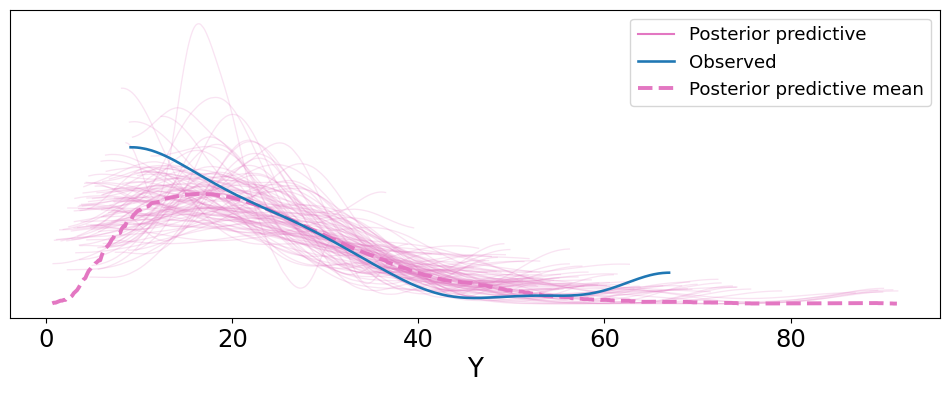

In [14]:
with pm.Model() as model_Plays_TD:
    # I have no idea where the mean should be, but its reasonalbe to assume
    # its between our lowest and highest values recorded
    P =pm.Normal('P', mu=20, sigma=3)
    SD =pm.HalfNormal('σ', sigma=15)
    #our fancy new likelihood, with one prior
    Y = pm.Gamma('Y', mu = P, sigma=SD, observed=data_Plays_Td['Plays/TD'])
    idata_Plays_TD = pm.sample()
    pm.sample_posterior_predictive(idata_Plays_TD, model=model_Plays_TD, extend_inferencedata=True)
    az.plot_ppc(idata_Plays_TD, num_pp_samples=100, figsize=(12, 4), colors=["C6", "C0", "C6"])

This is a roughly accurate model, there is a little bit of innaccuracy that we can attribute to noise, it also could be due to the model not perfectly capturing the relatively unusal trends.

This matches a lot better with the raw data. The definition of Gamma distribution is a continuous probability distribution, it's common in modeling waiting times, or time until a specific number of events occurs. In this context it is understandable as to how this would be similar to the amount of plays untill a touchdown.

The reason this is similar to amount of plays until a touchdown is due to the fact that it's a measured quantity that continues on until something stops it. Play runs are either stopped by a turnover, meaning they were not able to get 10 yards in 4 attempts, a field goal, or a touchdown. Since the data we are looking at only applies to play series that ended in a touchdown. So while it is often used in the terms of time until an occurance, such as time until death; we can view it as plays until a touchdown, which ends the data gathering. Meanwhile geometric is a number of trials until the first success.

It is also important to note that the reason Gamma could be a better application is due to the fact that the raw data was *total plays in a game* **per** *total touchdowns in a game*. Connecting with the idea of "time" until a specific number of events, while Geometric is just until a success in a binomial context.